In [2]:
import gc
from all_stand_var import conv_dict, lab_cols, vent_cols3
from all_own_funct import cnfl, value_filtering,y_modelling,x_modelling,evaluate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from seaborn import heatmap
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import kurtosis
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import locale
import pickle
locale.setlocale(locale.LC_ALL, 'fr_FR')
output_folder = os.path.join(os.getcwd(), 'Results_LR_RF_v2','1u_Results')
if not os.path.exists(output_folder):
    os.makedirs(output_folder)


In [3]:
"""
vent_cols3 = ['pat_hosp_id', 'pat_bd', 'pat_datetime', 'AdmissionDate', 'DischargeDate', 'mon_rr', 'mon_hr', 'mon_sat',
              'mon_etco2', 'vent_m_ppeak','vent_m_peep','vent_m_fio2',
             'mon_ibp_mean', 'pat_weight_act', 'vent_m_rr', 'vent_m_tv_exp']
dtype_dict={'vent_cat': 'category','vent_machine':'category','vent_mode':'category'}
df_raw=pd.read_csv(r'data\sorted_bron_date.csv',delimiter=';',converters=conv_dict,usecols=vent_cols3,dtype=dtype_dict,parse_dates=['pat_bd','pat_datetime','AdmissionDate', 'DischargeDate'],na_values=['NULL','null', 'Null','nUll','nuLl','nulL'],dayfirst=True)
"""



"\nvent_cols3 = ['pat_hosp_id', 'pat_bd', 'pat_datetime', 'AdmissionDate', 'DischargeDate', 'mon_rr', 'mon_hr', 'mon_sat',\n              'mon_etco2', 'vent_m_ppeak','vent_m_peep','vent_m_fio2',\n             'mon_ibp_mean', 'pat_weight_act', 'vent_m_rr', 'vent_m_tv_exp']\ndtype_dict={'vent_cat': 'category','vent_machine':'category','vent_mode':'category'}\ndf_raw=pd.read_csv(r'data\\sorted_bron_date.csv',delimiter=';',converters=conv_dict,usecols=vent_cols3,dtype=dtype_dict,parse_dates=['pat_bd','pat_datetime','AdmissionDate', 'DischargeDate'],na_values=['NULL','null', 'Null','nUll','nuLl','nulL'],dayfirst=True)\n"

In [4]:
import importlib
import LR_build as pp
importlib.reload(pp)
#df = pp.data_pp_function(df_raw,path=output_folder,timestep='12H')
#df=df.groupby('Admissionnumber',sort=False).fillna(method='ffill').fillna(method='bfill')
f = open(os.path.join('./Results_LR_RF_v2/', 'processed_df.txt'), 'rb')
df = pickle.load(f)
f.close()




In [5]:
vent_cols3 = [ 'pat_datetime',  'mon_rr', 'mon_hr', 'mon_sat',
              'mon_etco2', 'vent_m_fio2', 'vent_m_ppeak','vent_m_peep',
             'mon_ibp_mean','pat_weight_act','vent_m_rr', 'vent_m_tv_exp']
for col in vent_cols3:
    print(df[col].describe())

ipykernel_launcher:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
count                  230072
unique                 213053
top       2016-12-25 09:27:00
freq                        3
first     2008-11-22 03:17:00
last      2020-01-06 08:38:00
Name: pat_datetime, dtype: object
count    223194.000000
mean          0.113314
std           1.100918
min          -3.953401
25%          -0.653602
50%          -0.014931
75%           0.730185
max           6.584669
Name: mon_rr, dtype: float64
count    228495.000000
mean         -0.009268
std           0.283770
min          -1.761487
25%          -0.202186
50%          -0.002596
75%           0.184520
max           1.856091
Name: mon_hr, dtype: float64
count    226919.000000
mean         -0.101421
std           1.402197
min         -29.055462

1    720
Name: Reintub, dtype: int64
     pat_hosp_id  AdmissionDate        DischargeDate      
150  5150574      2015-12-19 00:46:00  2016-01-29 14:37:00   2015-12-27 09:07:00
                                       2016-01-29 14:37:00   2015-12-27 09:08:00
                                       2016-01-29 14:37:00   2015-12-27 09:09:00
                                       2016-01-29 14:37:00   2015-12-27 09:10:00
                                       2016-01-29 14:37:00   2015-12-27 09:11:00
                                                                     ...        
                                       2016-01-29 14:37:00   2015-12-27 10:42:00
                                       2016-01-29 14:37:00   2015-12-27 10:43:00
                                       2016-01-29 14:37:00   2015-12-27 10:44:00
                                       2016-01-29 14:37:00   2015-12-27 10:45:00
                                       2016-01-29 14:37:00   2015-12-27 10:46:00
Name: pat_dat

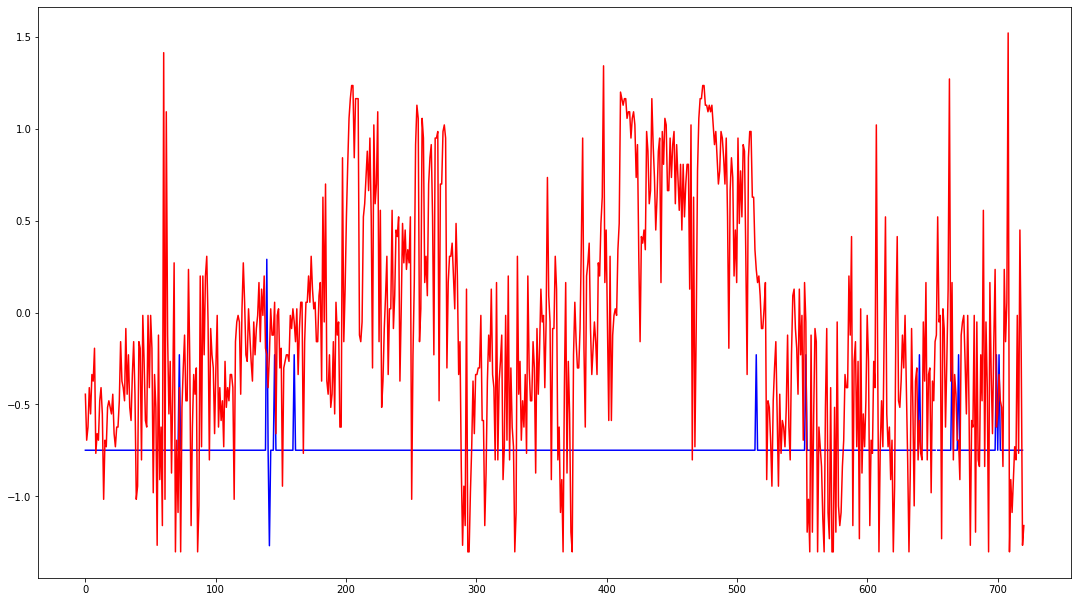

In [6]:

print(df[df.index.get_level_values('pat_hosp_id') == 5407]['Reintub'].value_counts())
print(df[df.index.get_level_values('pat_hosp_id') == 5150574]['pat_datetime'].tail(100))
plt.plot(np.linspace(start=0,stop=720,num=720),df[df.index.get_level_values('pat_hosp_id') == 5407]['vent_m_peep'],'b-')
plt.plot(np.linspace(start=0,stop=720,num=720),df[df.index.get_level_values('pat_hosp_id')==5150574]['vent_m_tv_exp'],'r-')
fig=plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()



In [7]:
print(df['Adnum'].value_counts())
print(df[df['Adnum']==383])

0      720
208    720
84     720
339    720
338    720
      ... 
306    240
47      65
76      28
284     10
383      1
Name: Adnum, Length: 327, dtype: int64
                                                               pat_datetime  \
    pat_hosp_id AdmissionDate       DischargeDate                             
319 9596291     2009-12-28 16:00:00 2010-01-02 11:00:00 2009-12-31 14:00:00   

                                                         pat_weight_act  \
    pat_hosp_id AdmissionDate       DischargeDate                         
319 9596291     2009-12-28 16:00:00 2010-01-02 11:00:00        1.271481   

                                                         mon_etco2    mon_hr  \
    pat_hosp_id AdmissionDate       DischargeDate                              
319 9596291     2009-12-28 16:00:00 2010-01-02 11:00:00        NaN -0.164763   

                                                         mon_ibp_mean  mon_rr  \
    pat_hosp_id AdmissionDate       DischargeDate     

In [8]:
"""
for pat in df.index.get_level_values('pat_hosp_id').unique():
    plt.plot(np.linspace(start=0,stop=len(df[df.index.get_level_values('pat_hosp_id') == pat]['pat_datetime']),num=len(df[df.index.get_level_values('pat_hosp_id') == pat]['pat_datetime'])),df[df.index.get_level_values('pat_hosp_id') == pat]['vent_m_peep'],'b-')
    plt.title(f'{pat}')
    plt.show()
"""

"\nfor pat in df.index.get_level_values('pat_hosp_id').unique():\n    plt.plot(np.linspace(start=0,stop=len(df[df.index.get_level_values('pat_hosp_id') == pat]['pat_datetime']),num=len(df[df.index.get_level_values('pat_hosp_id') == pat]['pat_datetime'])),df[df.index.get_level_values('pat_hosp_id') == pat]['vent_m_peep'],'b-')\n    plt.title(f'{pat}')\n    plt.show()\n"

In [9]:
from sklearn.preprocessing import StandardScaler
df=df.reset_index(drop=False)
df.info()
def index_1hr(group):
    group['tim']=pd.date_range(start='1/1/2018', periods=len(group), freq='1min')
    grouped = pd.Grouper(key='tim', freq='1H')
    group['idx_1hr']=group.groupby(grouped,sort=False).ngroup().add(1)
    group['mis']=(group['pat_datetime'].max()-group['pat_datetime'].min()).total_seconds()/60
    del group['tim']
    return group
#grouped = pd.Grouper(key='pat_datetime', freq='60min',label='left',convention='start')
#df['idx_1hr']=df.groupby(['Adnum','pat_hosp_id','AdmissionDate','DischargeDate'],sort=False,as_index=False).ngroup().add(1)
df=df.groupby('Adnum',sort=False,as_index=False).apply(index_1hr)
print((df['Adnum'].value_counts()))
print(df.info())
df['idx_1hr']=df['idx_1hr'].astype(str)
print(df['idx_1hr'].unique())
df[['mis']]=StandardScaler().fit_transform(df[['mis']])
df=df.set_index(['pat_hosp_id','AdmissionDate','DischargeDate'])







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230072 entries, 0 to 230071
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   level_0          230072 non-null  int64         
 1   pat_hosp_id      230072 non-null  int64         
 2   AdmissionDate    230072 non-null  datetime64[ns]
 3   DischargeDate    230072 non-null  datetime64[ns]
 4   pat_datetime     230072 non-null  datetime64[ns]
 5   pat_weight_act   230072 non-null  float32       
 6   mon_etco2        168135 non-null  float32       
 7   mon_hr           228495 non-null  float32       
 8   mon_ibp_mean     102556 non-null  float32       
 9   mon_rr           223194 non-null  float32       
 10  mon_sat          226919 non-null  float32       
 11  vent_m_fio2      225617 non-null  float32       
 12  vent_m_peep      223351 non-null  float32       
 13  vent_m_ppeak     229217 non-null  float32       
 14  vent_m_rr        229

In [10]:
print(df.info())
pat=pd.read_excel(r'Results\admissiondate_v2.xlsx', parse_dates=[
                            'AdmissionDate', 'DischargeDate'])
group=pat.groupby('pat_hosp_id',sort=False).max().reset_index()
group.drop_duplicates('pat_hosp_id',inplace=True)

df_train,df_val,df_test=pp.split_stratified_into_train_val_test(group, stratify_colname='Reintub',
                                         frac_train=0.7, frac_val=0.1, frac_test=0.2,
                                         random_state=1)

train_pat=df_train['pat_hosp_id'].unique()
test_pat=df_test['pat_hosp_id'].unique()
val_pat=df_val['pat_hosp_id'].unique()

df_train = df[df.index.get_level_values('pat_hosp_id').isin(train_pat)]
df_val = df[df.index.get_level_values('pat_hosp_id').isin(val_pat)]
df_test = df[df.index.get_level_values('pat_hosp_id').isin(test_pat)]



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 230072 entries, (2481139, Timestamp('2008-11-03 14:00:00'), Timestamp('2008-11-22 15:28:00')) to (6611048, Timestamp('2019-12-23 20:35:00'), Timestamp('2020-01-07 11:30:00'))
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   level_0          230072 non-null  int64         
 1   pat_datetime     230072 non-null  datetime64[ns]
 2   pat_weight_act   230072 non-null  float32       
 3   mon_etco2        168135 non-null  float32       
 4   mon_hr           228495 non-null  float32       
 5   mon_ibp_mean     102556 non-null  float32       
 6   mon_rr           223194 non-null  float32       
 7   mon_sat          226919 non-null  float32       
 8   vent_m_fio2      225617 non-null  float32       
 9   vent_m_peep      223351 non-null  float32       
 10  vent_m_ppeak     229217 non-null  float32       
 11  vent_m_rr        229999 non-null  f

In [11]:
print(df_train.info())
def y_modelling(df):
    y = df[['Reintub', 'Adnum', 'idx_1hr']]
    y = y.groupby(['Adnum', 'idx_1hr'], sort=False).agg(['max'])
    y.columns = ["_".join(a) for a in y.columns.to_flat_index()]
    y.reset_index(drop=True, inplace=True, level='idx_1hr')
    y = y.reset_index().drop_duplicates().set_index(
        ['Adnum'])
    y = y[~y.index.duplicated(keep='last')]
    y = y.fillna(value=0)
    return y

Y_TRAIN=y_modelling(df_train)
Y_TEST=y_modelling(df_test)
Y_VAL=y_modelling(df_val)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 160037 entries, (5534097, Timestamp('2009-02-02 02:45:00'), Timestamp('2009-02-23 14:00:00')) to (611813, Timestamp('2019-12-27 13:18:00'), Timestamp('2020-01-05 12:42:00'))
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   level_0          160037 non-null  int64         
 1   pat_datetime     160037 non-null  datetime64[ns]
 2   pat_weight_act   160037 non-null  float32       
 3   mon_etco2        114740 non-null  float32       
 4   mon_hr           158813 non-null  float32       
 5   mon_ibp_mean     67607 non-null   float32       
 6   mon_rr           154666 non-null  float32       
 7   mon_sat          157906 non-null  float32       
 8   vent_m_fio2      158765 non-null  float32       
 9   vent_m_peep      153643 non-null  float32       
 10  vent_m_ppeak     159271 non-null  float32       
 11  vent_m_rr        159964 non-null  fl

In [12]:
print(Y_TRAIN.value_counts())
print(Y_VAL.value_counts())
print(Y_TEST.value_counts())
Y_TRAIN=Y_TRAIN['Reintub_max'].to_numpy()
Y_TEST=Y_TEST['Reintub_max'].to_numpy()
Y_VAL=Y_VAL['Reintub_max'].to_numpy()
Y_TRAIN=np.append(Y_TRAIN,Y_VAL)


Reintub_max
0              204
1               25
dtype: int64
Reintub_max
0              27
1               4
dtype: int64
Reintub_max
0              60
1               7
dtype: int64


In [13]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 160037 entries, (5534097, Timestamp('2009-02-02 02:45:00'), Timestamp('2009-02-23 14:00:00')) to (611813, Timestamp('2019-12-27 13:18:00'), Timestamp('2020-01-05 12:42:00'))
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   level_0          160037 non-null  int64         
 1   pat_datetime     160037 non-null  datetime64[ns]
 2   pat_weight_act   160037 non-null  float32       
 3   mon_etco2        114740 non-null  float32       
 4   mon_hr           158813 non-null  float32       
 5   mon_ibp_mean     67607 non-null   float32       
 6   mon_rr           154666 non-null  float32       
 7   mon_sat          157906 non-null  float32       
 8   vent_m_fio2      158765 non-null  float32       
 9   vent_m_peep      153643 non-null  float32       
 10  vent_m_ppeak     159271 non-null  float32       
 11  vent_m_rr        159964 non-null  fl

In [14]:
df_train=df_train[['Age','mis','Extubation_date','level_0','pat_datetime', 'Reintub','idx_1hr','Adnum','pat_weight_act']]
df_val=df_val[['Age','mis','Extubation_date','level_0','pat_datetime', 'Reintub','idx_1hr','Adnum','pat_weight_act']]
df_test=df_test[['Age','mis','Extubation_date','level_0','pat_datetime', 'Reintub','idx_1hr','Adnum','pat_weight_act']]
output_folder = os.path.join(os.getcwd(), 'Results_LR_RF_12','Static')
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
def x_modelling(df):
    temp = df[['Age', 'mis', 'Adnum', 'idx_1hr','pat_weight_act']]
    df = df.drop(['Age','pat_weight_act','mis','Extubation_date','level_0','pat_datetime', 'Reintub'], axis=1)
    #df = df.groupby(['Adnum', 'idx_1hr'], sort=False).agg(['mean', 'std'])
    #df.columns = ["_".join(a) for a in df.columns.to_flat_index()]
    #df = df.stack().unstack([2, 1])
    #df.columns = ["_".join(a) for a in df.columns.to_flat_index()]
    #df = df.reset_index().drop_duplicates().set_index('Adnum')
    #df = df.fillna(method='ffill').fillna(method='bfill')

    temp = temp.groupby('Adnum', sort=False).agg(['mean'])
    temp.columns = ["_".join(a) for a in temp.columns.to_flat_index()]
    temp = temp.reset_index().drop_duplicates().set_index('Adnum')
    temp = temp[~temp.index.duplicated(keep='last')]
    #df = df.merge(temp, right_index=True, left_index=True, how='left')
    df=temp
    return df
X_TRAIN=x_modelling(df_train)
X_TEST=x_modelling(df_test)
X_VAL=x_modelling(df_val)
print(X_TRAIN.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 197 to 29
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age_mean             229 non-null    int64  
 1   mis_mean             229 non-null    float64
 2   pat_weight_act_mean  229 non-null    float32
dtypes: float32(1), float64(1), int64(1)
memory usage: 6.3 KB
None


In [15]:
X_TRAIN=X_TRAIN.append(X_VAL)

In [ ]:
f = open(os.path.join(output_folder, 'x_train.txt'), 'wb')
pickle.dump(X_TRAIN, f)
f.close()

f = open(os.path.join(output_folder, 'x_test.txt'), 'wb')
pickle.dump(X_TEST, f)
f.close()

f = open(os.path.join(output_folder, 'y_train.txt'), 'wb')
pickle.dump(Y_TRAIN, f)
f.close()

f = open(os.path.join(output_folder, 'y_test.txt'), 'wb')
pickle.dump(Y_TEST, f)
f.close()

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_TRAIN, Y_TRAIN)





Fitting 3 folds for each of 20 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   49.6s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 22, 26, 30,
                                                      34, 38, 42, 46, 50,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix,average_precision_score,f1_score,roc_curve,roc_auc_score,plot_confusion_matrix

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42,max_depth=10)
base_model.fit(X_TRAIN, Y_TRAIN)
base_accuracy = evaluate(base_model, X_TEST, Y_TEST,'base_accuracy RF',output_folder)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_TEST,Y_TEST,'Best_random RF',output_folder)

if base_accuracy > random_accuracy:
    best_random = base_model

Model Performance
average_precision = 0.23046363059805164
F1 score: 0.25 
AUC = 0.48571428571428565
Model Performance
average_precision = 0.1100853394971042
F1 score: 0.0 
AUC = 0.43452380952380953


In [18]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,average_precision_score,f1_score,roc_curve,roc_auc_score,plot_confusion_matrix
from matplotlib.backends.backend_pdf import PdfPages

from all_own_funct import roc_auc_ci
try:
    pdf = PdfPages(os.path.join(output_folder,f"Figures_all_.pdf"))
except PermissionError:
    os.remove(os.path.join(output_folder,f"Figures_all.pdf"))
    os.remove(os.path.join(output_folder,f"Result_scores_all.txt"))
clf = best_random
y_pred_clas=clf.predict(X_TEST)
# Predict the probabilities, function depends on used classifier

try:
    y_pred_prob=clf.predict_proba(X_TEST)
    y_pred_prob=y_pred_prob[:,1]
except:
    try:
        y_pred_prob=clf.decision_function(X_TEST)
    except:
        y_pred_prob=y_pred_clas

report=classification_report(Y_TEST,y_pred_clas,target_names=['No Reintubation','Reintubation'])
score=clf.score(X_TEST,Y_TEST)
average_precision = average_precision_score(Y_TEST, y_pred_prob)
f1_s=f1_score(Y_TEST, y_pred_clas)

# write scoring metrics to file
with open(os.path.join(output_folder,f"Result_scores_all.txt"),'a') as file:
    file.write(f"Results for RF on training set\n\n")
    file.write(f"Classification report \n {report} \n")
    file.write(f"Hold_out_scores {score} \n")
    file.write(f"Average precision score {average_precision} \n")
    file.write(f"F1 score {f1_s} \n\n\n")

plot_confusion_matrix(clf,X_TEST,Y_TEST)
plt.title(f"Confusion matrix of random forrest")
fig=plt.gcf()
pdf.savefig(fig)
plt.close(fig)

fpr, tpr, _ = roc_curve(Y_TEST,  y_pred_prob)
auc = roc_auc_score(Y_TEST, y_pred_prob)

n_bootstraps = 2000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred_prob), len(y_pred_prob))
    if len(np.unique(Y_TEST[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(Y_TEST[indices], y_pred_prob[indices])
    bootstrapped_scores.append(score)
    #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
a=roc_auc_ci(Y_TEST,y_pred_prob)
print(a)


plt.plot(fpr,tpr,label=f"auc={auc}",linewidth=1.5,markersize=1)

plt.legend(loc=4,fontsize='xx-small')
plt.title(f'ROC of Random Forrest hour data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
fig=plt.gcf()
pdf.savefig(fig)
plt.close(fig)


Confidence interval for the score: [0.287 - 0.711]
(0.2598583675031362, 0.7115702039254351)


In [19]:
# Number of trees in random forest
# Number of features to consider at every split
solver =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# Maximum number of levels in tree
class_weight=[{0:0.1,1:0.9},'balanced',None]
# Minimum number of samples required to split a node
penalty=['l1', 'l2', 'elasticnet', None]
# Minimum number of samples required at each leaf node
C=np.logspace(-3,3,7)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'solver':solver,
                'class_weight':class_weight,
                'penalty':penalty,
                'C':C,
                'penalty':penalty}

In [20]:
# First create the base model to tune
lr = LogisticRegression(max_iter=500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
lr_random = RandomizedSearchCV(estimator = lr , param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
lr_random.fit(X_TRAIN, Y_TRAIN)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished


RandomizedSearchCV(cv=3, estimator=LogisticRegression(max_iter=500), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'class_weight': [{0: 0.1, 1: 0.9},
                                                         'balanced', None],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=2)

In [24]:
base_model_lr = LogisticRegression(max_iter=500)
base_model_lr.fit(X_TRAIN, Y_TRAIN)
base_accuracy_lr = evaluate(base_model, X_TEST, Y_TEST,'base_model LR',output_folder)

best_random_lr = lr_random.best_estimator_
random_accuracy_lr = evaluate(best_random, X_TEST,Y_TEST,'Best random LR',output_folder)

if base_accuracy_lr > random_accuracy_lr:
    best_random_lr = base_model_lr

Model Performance
average_precision = 0.13512887672551538
F1 score: 0.0 
AUC = 0.6178571428571429
Model Performance
average_precision = 0.23046363059805164
F1 score: 0.25 
AUC = 0.48571428571428565


In [25]:
clf = best_random_lr


y_pred_clas=clf.predict(X_TEST)
# Predict the probabilities, function depends on used classifier

try:
    y_pred_prob=clf.predict_proba(X_TEST)
    y_pred_prob=y_pred_prob[:,1]
except:
    try:
        y_pred_prob=clf.decision_function(X_TEST)
    except:
        y_pred_prob=y_pred_clas

report=classification_report(Y_TEST,y_pred_clas,target_names=['No Reintubation','Reintubation'])
score=clf.score(X_TEST,Y_TEST)
average_precision = average_precision_score(Y_TEST, y_pred_prob)
f1_s=f1_score(Y_TEST, y_pred_clas)

with open(os.path.join(output_folder,f"Result_scores_all.txt"),'a') as file:
    file.write(f"Results for LR on training\n\n")
    file.write(f"Classification report \n {report} \n")
    file.write(f"Hold_out_scores {score} \n")
    file.write(f"Average precision score {average_precision} \n")
    file.write(f"F1 score {f1_s} \n\n\n")

plot_confusion_matrix(clf,X_TEST,Y_TEST)
plt.title(f"Confusion matrix of logistic regression")
fig=plt.gcf()
pdf.savefig(fig)
plt.close(fig)

fpr, tpr, _ = roc_curve(Y_TEST,  y_pred_prob)
auc = roc_auc_score(Y_TEST, y_pred_prob)


n_bootstraps = 2000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred_prob), len(y_pred_prob))
    if len(np.unique(Y_TEST[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(Y_TEST[indices], y_pred_prob[indices])
    bootstrapped_scores.append(score)
    #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

a=roc_auc_ci(Y_TEST,y_pred_prob)
print(a)

plt.plot(fpr,tpr,label=f"auc={auc}",linewidth=1.5,markersize=1)


plt.legend(loc=4,fontsize='xx-small')
plt.title(f'ROC of Logistic Regression data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
fig=plt.gcf()
pdf.savefig(fig)
plt.close(fig)
pdf.close()


C:\Users\berend\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Confidence interval for the score: [0.458 - 0.767]
(0.3846131968132988, 0.8511010889009869)


In [26]:
import pickle
f = open(os.path.join(output_folder,'ran_for.sav'), 'wb')
pickle.dump(best_random, f)
f.close()

f = open(os.path.join(output_folder,'log_reg.sav'), 'wb')
pickle.dump(best_random_lr, f)
f.close()